In [194]:
import json
import urllib
import requests
import csv
import re
import calcTimeStamp
import UTC2local

# Calculate the time and date for calucaltions so far

xy = UTC2local.UTC2local()
start, end = (xy[0], xy[1])
start = start - 14400
start = str(start)
end = str(end)
print(start,end)

1689739200
1689739200 1689739961


In [195]:
import datetime
from datetime import datetime
import dataFile

#
# Get data from the Tempest database for the new station
#

token = '877f6425-04a5-4f33-86e7-7123b7ef53d9'
protocol = 'https://'
urlSiteDevice = 'swd.weatherflow.com/swd/rest/observations/device/'
urlSiteStation = 'swd.weatherflow.com/swd/rest/observations/station/'
deviceID = '246921'
stationID = '95775'
preToken = '&token='
preStart = '?time_start='
preEnd = '&time_end='
start_time = start
end_time = end
dayOffset = '&day_offset=1'
format1 = '&format=csv'
print(start_time, end_time)
#
# Put it together
# 

goGetDeviceSummary = (f'{protocol}{urlSiteDevice}{deviceID}{preStart}{start_time}{preEnd}{end_time}{format1}{preToken}{token}')
print(goGetDeviceSummary)
r =  requests.get(goGetDeviceSummary)
path_to_file = '/Users/jameshayes/'
#path_to_file = '/home/ec2-user/'
full_file = (f'{path_to_file}latestTempestinfo.csv')

with open(full_file,'w') as fd:
     fd.write(r.text)

1689739200 1689739961
https://swd.weatherflow.com/swd/rest/observations/device/246921?time_start=1689739200&time_end=1689739961&format=csv&token=877f6425-04a5-4f33-86e7-7123b7ef53d9


In [196]:
import pandas as pd
import dataFile
import datetime
from datetime import datetime
from dateutil.tz import tzutc, tzlocal
import pytz

#
# Read in the CSV file for processing in pandas
#

full_file =(f'{path_to_file}latestTempestinfo.csv')
df = pd.read_csv(full_file, index_col=False)

pd.set_option('display.max_rows', 1440)
pd.set_option('display.max_columns', 35)
pd.set_option('display.width', 1500)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)

latestT = (df['temperature'].iloc[-1]) 
lastT = round((latestT*1.8) + 32)

timezone = pytz.timezone("America/New_York")
recentT = (df['timestamp'].iloc[-1])
dt_object = datetime.fromtimestamp(recentT)
localT = dt_object.astimezone(timezone)
lastTime = localT.strftime('%I:%M %p')  
time24 = localT.strftime('%-H')  
time24 = int(time24)
print(time24)

print(lastT, lastTime)

# write the data to a csv file with an html suffix

new_path = '/Users/jameshayes/'
#new_path = '/home/ec2-user'

with open(f'{new_path}LatestT_tempest.csv', 'w') as outfile:
    print(f'{lastT},{lastTime}',file = outfile)

0
72 12:12 AM


In [197]:
import openpyxl
from openpyxl import load_workbook
import datetime
from datetime import datetime
import excelFilename
import calcTimeNow
from calcTimeNow import calcTimeNow
import getNameNumbers

In [198]:
#
# Create the month name for the xlsx filename
#

gg = getNameNumbers.tempest_ec2()

xls_filename, xls_fullfile, path_name, date, thisYear, this_month = gg[0], gg[1], gg[2], gg[3], gg[4], gg[5]
file_name1 = 'Tempest_temp.xlsx'
new_path = '/Users/jameshayes/'
comp_fileName = f'{new_path}{file_name1}' 

wb = openpyxl.load_workbook(comp_fileName)
sheet = wb.active

a3 = sheet['A1']
a3.value = 'Time'
b3 = sheet['B1']
b3.value = 'Temperature'

# Write the data..

nowTime = sheet.cell(row = time24 + 2, column = 1)
nowTime.value = lastTime

newest_T = sheet.cell(row = time24 + 2, column = 2)
newest_T.value = lastT

wb.save(comp_fileName)

Today is:  2023-07-19
The day of the month is:  19 

This month is : July
This year is:  2023
Number of days this month:  31 

Yesterday was:  2023-07-18
The day of the month yesterday was:  18 

Last month was:  June
Last year was:  2022 

Number of days last month:  30 

Last day of the previous month:  30
Last day of the previous year:  31 



In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import calcTimeNow
import getDaysInMonth
import getNameNumbers

,Time,Temperature
0,12:12 AM,72.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


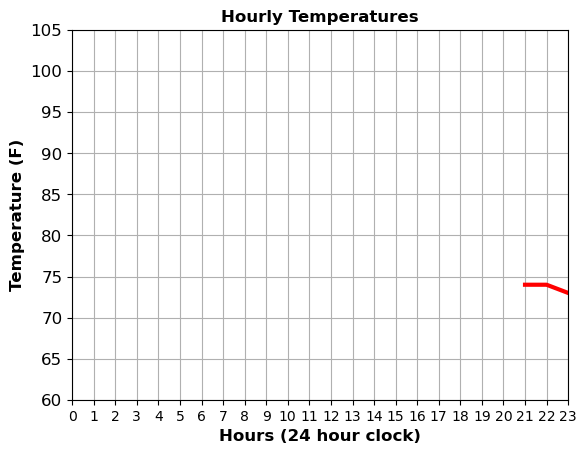

In [200]:
# Defining some variables


comp_fileName = f'{new_path}{file_name1}' 
path1 = '/Users/jameshayes/Sites/'    

df = pd.read_excel(comp_fileName)
display(df)

t = df['Temperature']
y = t.to_numpy()

plt.ylim(60, 105)
plt.yticks(fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
#plt.locator_params(axis='y', nbins=20)

plt.xlim(0,23)
plt.xticks(np.arange(0,24,1))
plt.xlabel('Hours (24 hour clock)', fontsize=12, fontweight ='bold')

plt.title(f'Hourly Temperatures', fontsize=12, fontweight ='bold')
plt.plot(y,  color = "red", linewidth =3, label ="Temperature")
plt.grid(True)

plt.savefig(f'{path1}testTT')  